## Read .csv file from bucket

In [ ]:
!pip install azure-storage-blob

In [2]:
import pandas as pd
from io import StringIO
from azure.storage.blob import BlobServiceClient, BlobClient, ContainerClient

connection_string = "<YOUR-KEY>"
container_name = "<YOUR-BUCKET>"
blob_name = "<YOUR-FILE>"

blob_service_client = BlobServiceClient.from_connection_string(connection_string)
container_client = blob_service_client.get_container_client(container_name)

blob_client = container_client.get_blob_client(blob_name)
csv_data = blob_client.download_blob().content_as_text()

data = StringIO(csv_data)
df = pd.read_csv(data)

In [3]:
df.head()

,Unnamed: 0,Coverage %,Outliers #,Missing data %,vendor_failed,vendor_succeeded,period,vendor_name
0,address.to_name,71.428571,NaN,28.571429,2,5,2023-02,EKATA
1,address.validity_level,71.428571,NaN,28.571429,2,5,2023-02,EKATA
2,dateTime,100.000000,NaN,0.000000,2,5,2023-02,EKATA
3,email.domain_creation_date,71.428571,NaN,28.571429,2,5,2023-02,EKATA
4,email.first_seen_days,71.428571,1.0,28.571429,2,5,2023-02,EKATA


## Read Image file from bucket

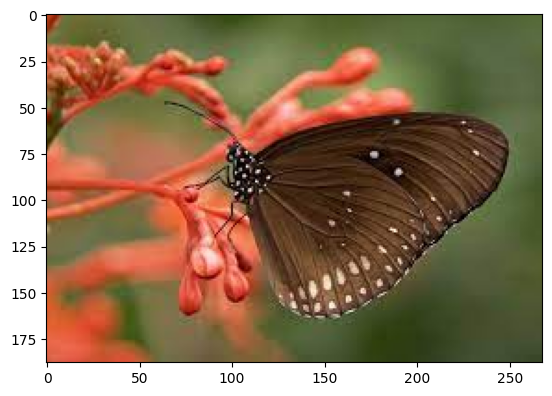

In [ ]:
from azure.storage.blob import BlobServiceClient, BlobClient, ContainerClient
import io
from PIL import Image
import matplotlib.pyplot as plt

try:
    blob_service_client = BlobServiceClient.from_connection_string(connection_string)
    blob_name = '<YOUR_IMG_NAME>'
    blob_client = blob_service_client.get_blob_client(container_name, blob_name)

    stream = io.BytesIO()
    download_stream = blob_client.download_blob()
    stream.write(download_stream.readall())

    stream.seek(0)
    image = Image.open(stream)
    
    plt.imshow(image)
    plt.show()

except Exception as ex:
    print('Exception:')
    print(ex)